# Download dataset

In [1]:
import kaggle
from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()

In [2]:
api.dataset_download_file('gregorut/videogamesales', file_name='vgsales.csv')

True

In [4]:
from zipfile import ZipFile

with ZipFile('vgsales.csv.zip', 'r') as zip:
    zip.printdir()
    print('Extracting all the files...')
    zip.extractall()
    print('Done!')

File Name                                             Modified             Size
vgsales.csv                                    2019-09-19 23:33:42      1355781
Extracting all the files...
Done!


# Explore

## Clean and order

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
plt.style.use('seaborn')
paleta = 'crest_r'
paleta1 = 'flare_r'
paleta2 = sns.color_palette('YlGnBu_r')

In [2]:
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
print(f'-----Valores N/A:------\n{df.isna().sum()}')

-----Valores N/A:------
Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


In [4]:
df.dropna(how='any', inplace=True)
print(f'-----Valores N/A:------\n{df.isna().sum()}')

-----Valores N/A:------
Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64


In [5]:
df.loc[:, ['Year']] = df.Year.astype(int)
df.set_index('Year', inplace=True)
df.index = pd.to_datetime(df.index, errors='coerce', format='%Y')
df.sort_index(inplace=True)
df.index = df.index.year
df

,Rank,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,,,,,,
1980,259,Asteroids,2600,Shooter,Atari,4.00,0.26,0.00,0.05,4.31
1980,6319,Bridge,2600,Misc,Activision,0.25,0.02,0.00,0.00,0.27
1980,1971,Defender,2600,Misc,Atari,0.99,0.05,0.00,0.01,1.05
1980,5368,Freeway,2600,Action,Activision,0.32,0.02,0.00,0.00,0.34
1980,1768,Kaboom!,2600,Misc,Activision,1.07,0.07,0.00,0.01,1.15
...,...,...,...,...,...,...,...,...,...,...
2016,5290,Star Fox: Zero,WiiU,Shooter,Nintendo,0.16,0.10,0.07,0.03,0.35
2017,14393,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,Role-Playing,Sega,0.00,0.00,0.03,0.00,0.03
2017,16441,Brothers Conflict: Precious Baby,PSV,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01


## Plots

In [6]:
df_sales = df.iloc[:,5:]
df_sales.rename(columns={'NA_Sales':'EUA_Sales', 'EU_Sales':'Europa_Sales', 'JP_Sales':'Japan_Sales'}, inplace=True)
df_sales

,EUA_Sales,Europa_Sales,Japan_Sales,Other_Sales,Global_Sales
Year,,,,,
1980,4.00,0.26,0.00,0.05,4.31
1980,0.25,0.02,0.00,0.00,0.27
1980,0.99,0.05,0.00,0.01,1.05
1980,0.32,0.02,0.00,0.00,0.34
1980,1.07,0.07,0.00,0.01,1.15
...,...,...,...,...,...
2016,0.16,0.10,0.07,0.03,0.35
2017,0.00,0.00,0.03,0.00,0.03
2017,0.00,0.00,0.01,0.00,0.01


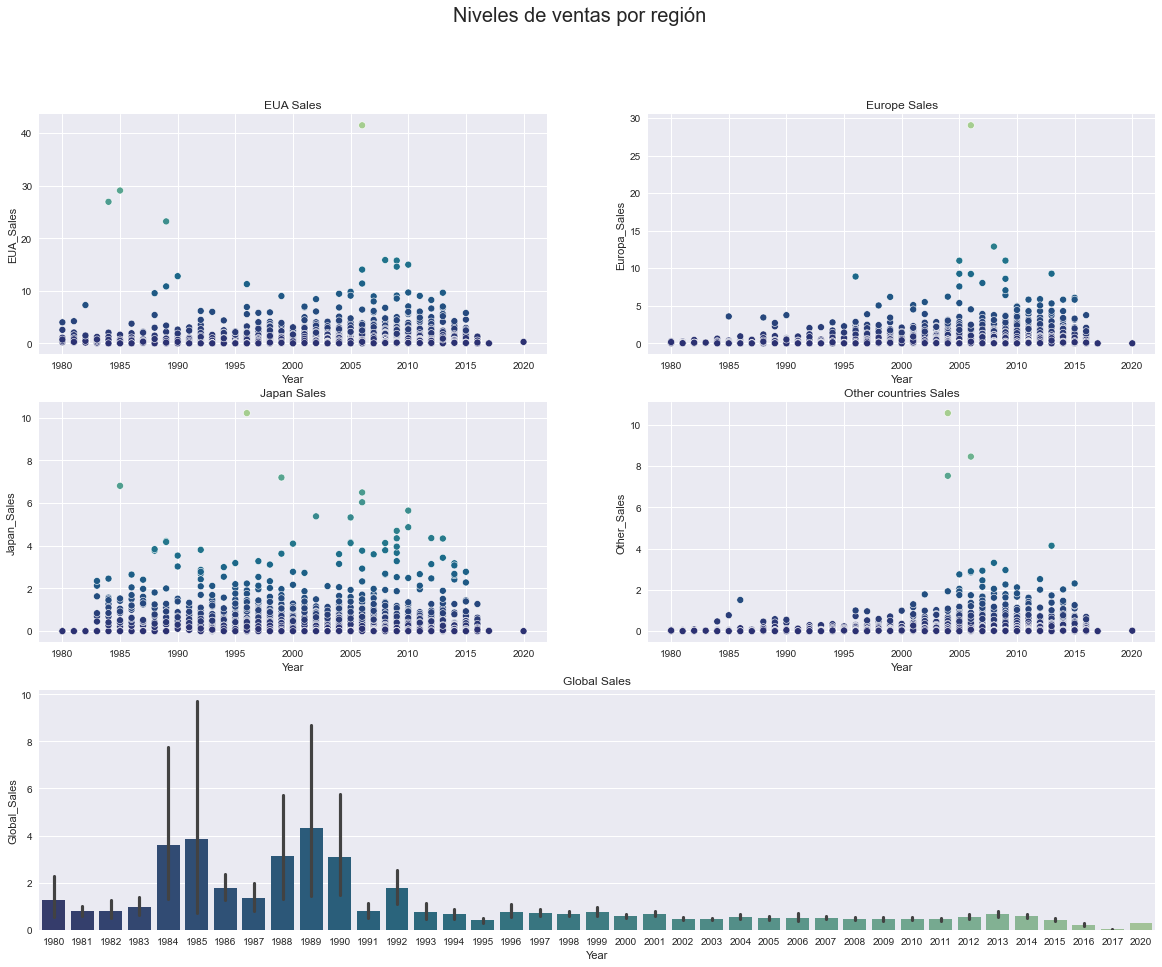

In [7]:
fig, ax = plt.subplots(figsize = (20,15))

ax1 = plt.subplot2grid(shape = (3,2), loc = (0,0)) 
ax2 = plt.subplot2grid(shape = (3,2), loc = (0,1)) 
ax3 = plt.subplot2grid(shape = (3,2), loc = (1,0))
ax4 = plt.subplot2grid(shape = (3,2), loc = (1,1))
ax5 = plt.subplot2grid(shape = (3,2), loc = (2,0), colspan=2)

ax1 = sns.scatterplot(x = df_sales.index, y = df_sales.iloc[:,0], hue = df_sales.iloc[:,0], ax=ax1, palette=paleta, legend=False)
ax1.set_title('EUA Sales')

ax2 = sns.scatterplot(x = df_sales.index, y = df_sales.iloc[:,1], hue = df_sales.iloc[:,1], ax=ax2, palette=paleta, legend=False)
ax2.set_title('Europe Sales')

ax3 = sns.scatterplot(x = df_sales.index, y = df_sales.iloc[:,2], hue = df_sales.iloc[:,2], ax=ax3, palette=paleta, legend=False)
ax3.set_title('Japan Sales')

ax4 = sns.scatterplot(x = df_sales.index, y = df_sales.iloc[:,3], hue = df_sales.iloc[:,3], ax=ax4, palette=paleta, legend=False)
ax4.set_title('Other countries Sales')

ax5 = sns.barplot(x = df_sales.index, y = df_sales.iloc[:,4], ax=ax5, palette=paleta)
ax5.set_title('Global Sales')

plt.suptitle('Niveles de ventas por región', fontsize = 20)
plt.show()

# Plataform

In [8]:
df

,Rank,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,,,,,,
1980,259,Asteroids,2600,Shooter,Atari,4.00,0.26,0.00,0.05,4.31
1980,6319,Bridge,2600,Misc,Activision,0.25,0.02,0.00,0.00,0.27
1980,1971,Defender,2600,Misc,Atari,0.99,0.05,0.00,0.01,1.05
1980,5368,Freeway,2600,Action,Activision,0.32,0.02,0.00,0.00,0.34
1980,1768,Kaboom!,2600,Misc,Activision,1.07,0.07,0.00,0.01,1.15
...,...,...,...,...,...,...,...,...,...,...
2016,5290,Star Fox: Zero,WiiU,Shooter,Nintendo,0.16,0.10,0.07,0.03,0.35
2017,14393,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,Role-Playing,Sega,0.00,0.00,0.03,0.00,0.03
2017,16441,Brothers Conflict: Precious Baby,PSV,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01


In [9]:
top_plataforma = []
for i in df.Platform.unique():
    top_plataforma.append([i,df[df['Platform'] == i].shape[0]])

df_top_plataforma = pd.DataFrame(top_plataforma, columns=['Plataforma', 'Score'])
df_top_plataforma.set_index('Plataforma', inplace=True)
df_top_plataforma.sort_values(by='Score', ascending=False, inplace=True)
df_top_plataforma.head()

,Score
Plataforma,
DS,2131
PS2,2127
PS3,1304
Wii,1290
X360,1234


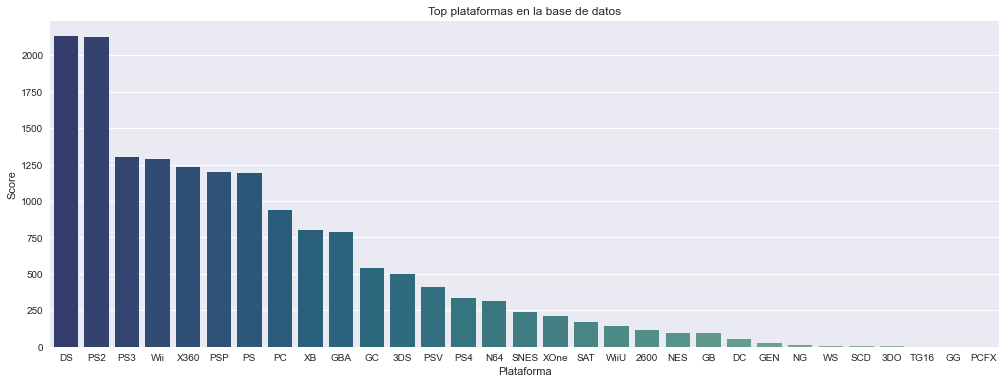

In [10]:
plt.figure(figsize = (17,6))
sns.barplot(x = df_top_plataforma.index, y = df_top_plataforma.Score, palette=paleta)
plt.title('Top plataformas en la base de datos')
plt.show()

In [11]:
df_popular_platforms = df.groupby('Platform')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum()
df_popular_platforms.sort_values(by='Global_Sales', ascending=False, inplace=True)
df_popular_platforms.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,
PS2,572.92,332.63,137.54,190.47,1233.46
X360,594.33,278.00,12.30,84.67,969.60
PS3,388.90,340.47,79.21,140.81,949.35
Wii,497.37,264.35,68.28,79.20,909.81
DS,388.53,194.05,175.02,60.29,818.91


In [12]:
temp1 = df_popular_platforms['NA_Sales'].sort_values(ascending=False).iloc[:5]
temp2 = df_popular_platforms['EU_Sales'].sort_values(ascending=False).iloc[:5]
temp3 = df_popular_platforms['JP_Sales'].sort_values(ascending=False).iloc[:5]
temp4 = df_popular_platforms['Other_Sales'].sort_values(ascending=False).iloc[:5]
temp5 = df.groupby('Genre')[['Global_Sales']].sum().sort_values(by='Global_Sales', ascending=False)

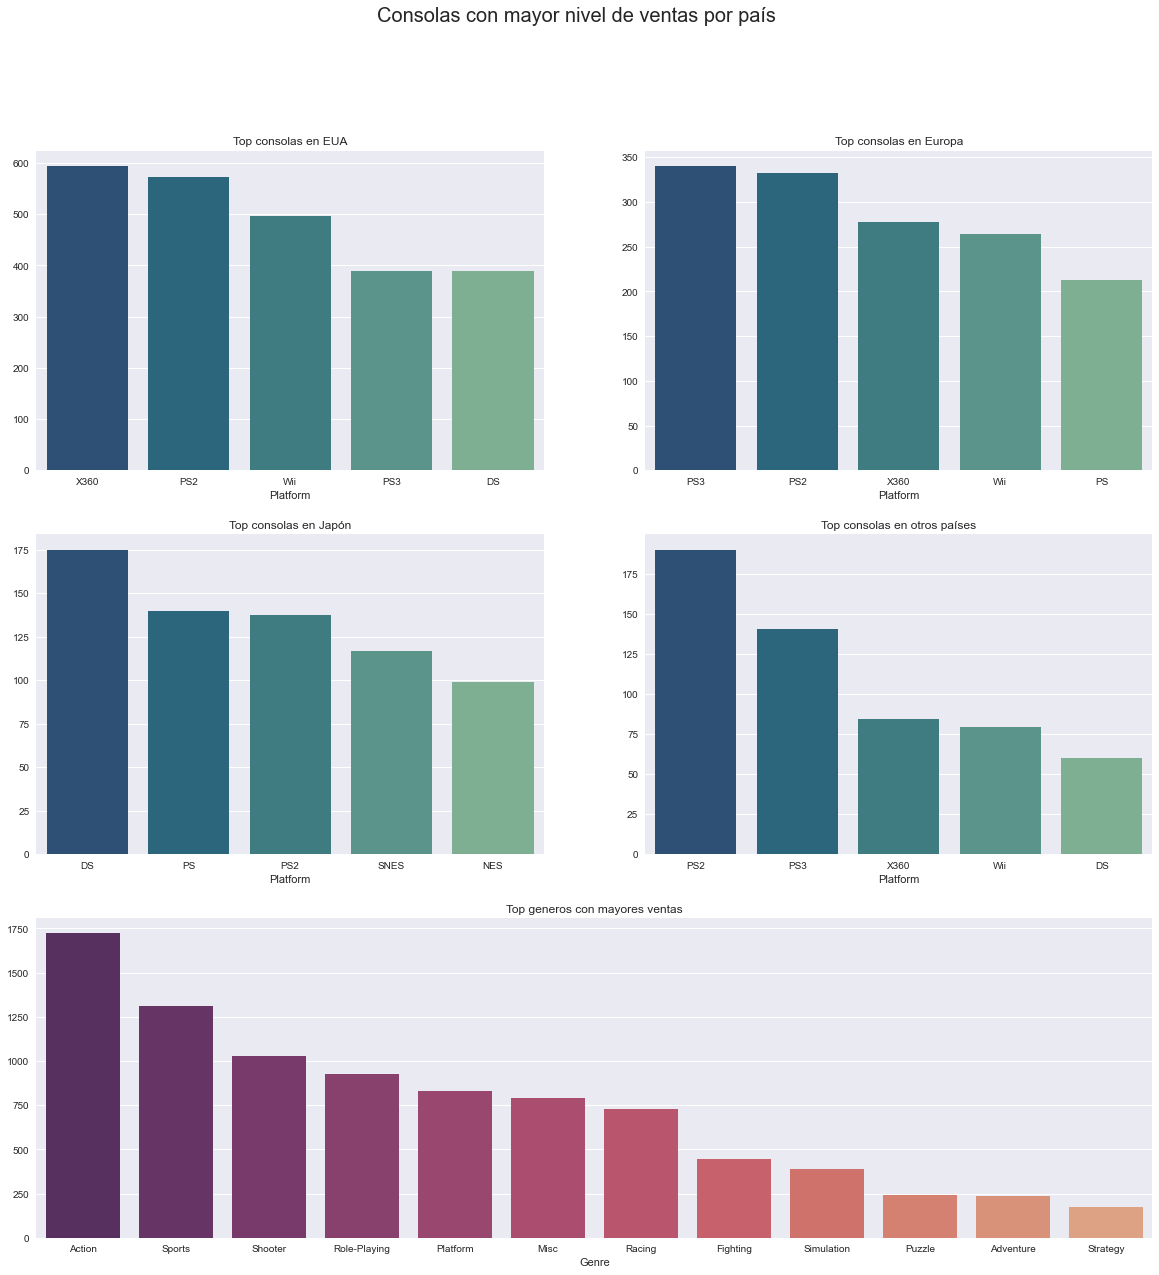

In [13]:
ax, fig = plt.subplots(figsize = (20,20))

ax1 = plt.subplot2grid(shape=(3,2), loc=(0,0))
ax2 = plt.subplot2grid(shape=(3,2), loc=(0,1)) 
ax3 = plt.subplot2grid(shape=(3,2), loc=(1,0))
ax4 = plt.subplot2grid(shape=(3,2), loc=(1,1))
ax5 = plt.subplot2grid(shape=(3,2), loc=(2,0), colspan=2)

ax1 = sns.barplot(x = temp1.index, y = temp1.values, palette=paleta, ax=ax1)
ax1.set_title('Top consolas en EUA')
ax2 = sns.barplot(x = temp2.index, y = temp2.values, palette=paleta, ax=ax2)
ax2.set_title('Top consolas en Europa')
ax3 = sns.barplot(x = temp3.index, y = temp3.values, palette=paleta, ax=ax3)
ax3.set_title('Top consolas en Japón')
ax4 = sns.barplot(x = temp4.index, y = temp4.values, palette=paleta, ax=ax4)
ax4.set_title('Top consolas en otros países')
ax5 = sns.barplot(x = temp5.index, y = temp5['Global_Sales'].values, palette=paleta1, ax=ax5)
ax5.set_title('Top generos con mayores ventas')

plt.suptitle('Consolas con mayor nivel de ventas por país', fontsize = 20)
plt.show()

# Genres

In [14]:
df

,Rank,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,,,,,,
1980,259,Asteroids,2600,Shooter,Atari,4.00,0.26,0.00,0.05,4.31
1980,6319,Bridge,2600,Misc,Activision,0.25,0.02,0.00,0.00,0.27
1980,1971,Defender,2600,Misc,Atari,0.99,0.05,0.00,0.01,1.05
1980,5368,Freeway,2600,Action,Activision,0.32,0.02,0.00,0.00,0.34
1980,1768,Kaboom!,2600,Misc,Activision,1.07,0.07,0.00,0.01,1.15
...,...,...,...,...,...,...,...,...,...,...
2016,5290,Star Fox: Zero,WiiU,Shooter,Nintendo,0.16,0.10,0.07,0.03,0.35
2017,14393,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,Role-Playing,Sega,0.00,0.00,0.03,0.00,0.03
2017,16441,Brothers Conflict: Precious Baby,PSV,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01


In [45]:
gk = df.groupby(['Genre', 'Publisher'])[['Global_Sales']].sum()
gk

Global_Sales
Genre    Publisher                                           
Action   20th Century Fox Video Games                    1.72
         3DO                                             6.28
         505 Games                                       3.22
         5pb                                             0.13
         989 Studios                                     2.63
...                                                       ...
Strategy Vivendi Games                                   0.62
         Warner Bros. Interactive Entertainment          2.86
         Westwood Studios                                1.55
         Zoo Digital Publishing                          0.09
         Zushi Games                                     0.07

[1823 rows x 1 columns]

## Action games

In [16]:
gk_action = gk.loc['Action'].sort_values(by='Global_Sales', ascending=False).reset_index()
gk_action.head(10)

,Publisher,Global_Sales
0,Take-Two Interactive,211.08
1,Ubisoft,142.94
2,Activision,141.82
3,Nintendo,128.10
4,Electronic Arts,115.34
5,Warner Bros. Interactive Entertainment,106.69
6,Sony Computer Entertainment,94.52
7,THQ,89.16
8,Capcom,85.16
9,Konami Digital Entertainment,69.70


In [17]:
others = {'Publisher':'Other Contries', 'Global_Sales':gk_action.iloc[5:,1].sum()}
others

{'Publisher': 'Other Contries', 'Global_Sales': 983.5599999999998}

In [18]:

gk_action_top = gk_action.iloc[:5]
gk_action_top = gk_action_top.append(others, ignore_index=True)
gk_action_top


,Publisher,Global_Sales
0,Take-Two Interactive,211.08
1,Ubisoft,142.94
2,Activision,141.82
3,Nintendo,128.10
4,Electronic Arts,115.34
5,Other Contries,983.56


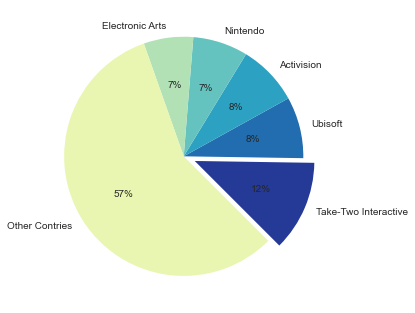

In [19]:
plt.pie(x = gk_action_top.Global_Sales, labels=gk_action_top.Publisher, colors=paleta2, startangle=-45, autopct='%.0f%%', explode=(0.1, 0, 0, 0, 0, 0),)
plt.show()

In [72]:
def top_frame(genre, gk, column_to_explore):
    '''Disponible Genres:
    Shooter, Misc, Action, Sports, Fighting, Puzzle, Racing, Platform, Simulation, Adventure, }
    Role-Playing,Strategy'''

    gk_genre = gk.loc[genre].sort_values(by='Global_Sales', ascending=False).reset_index()
    others = {column_to_explore:'Other Contries', 'Global_Sales':gk_genre.iloc[5:,1].sum()}
    gk_top = gk_genre.iloc[:5]
    gk_top = gk_top.append(others, ignore_index=True)
    return gk_top

def top_array(genre, gk, column_to_explore):
    '''Disponible Genres:
    Shooter, Misc, Action, Sports, Fighting, Puzzle, Racing, Platform, Simulation, Adventure, }
    Role-Playing,Strategy'''

    gk_genre = gk.loc[genre].sort_values(by='Global_Sales', ascending=False).reset_index()
    others = {column_to_explore:'Other Contries', 'Global_Sales':gk_genre.iloc[5:,1].sum()}
    gk_top = gk_genre.iloc[:5]
    gk_top = gk_top.append(others, ignore_index=True)
    gk_top = gk_top.to_dict()
    return gk_top

In [48]:
Shooter = top_frame('Shooter', gk, 'Publisher')
Misc = top_frame('Misc', gk, 'Publisher')
Action = top_frame('Action', gk, 'Publisher')
Sport = top_frame('Sports', gk, 'Publisher')
Fighter = top_frame('Fighting', gk, 'Publisher')
Puzzle = top_frame('Puzzle', gk, 'Publisher')
Racing = top_frame('Racing', gk, 'Publisher')
Platform = top_frame('Platform', gk, 'Publisher')
Sumulation = top_frame('Simulation', gk, 'Publisher')
Adventure = top_frame('Adventure', gk, 'Publisher')
Role = top_frame('Role-Playing', gk, 'Publisher')
strategy = top_frame('Strategy', gk, 'Publisher')

Text(0.5, 1.0, 'Strategy')

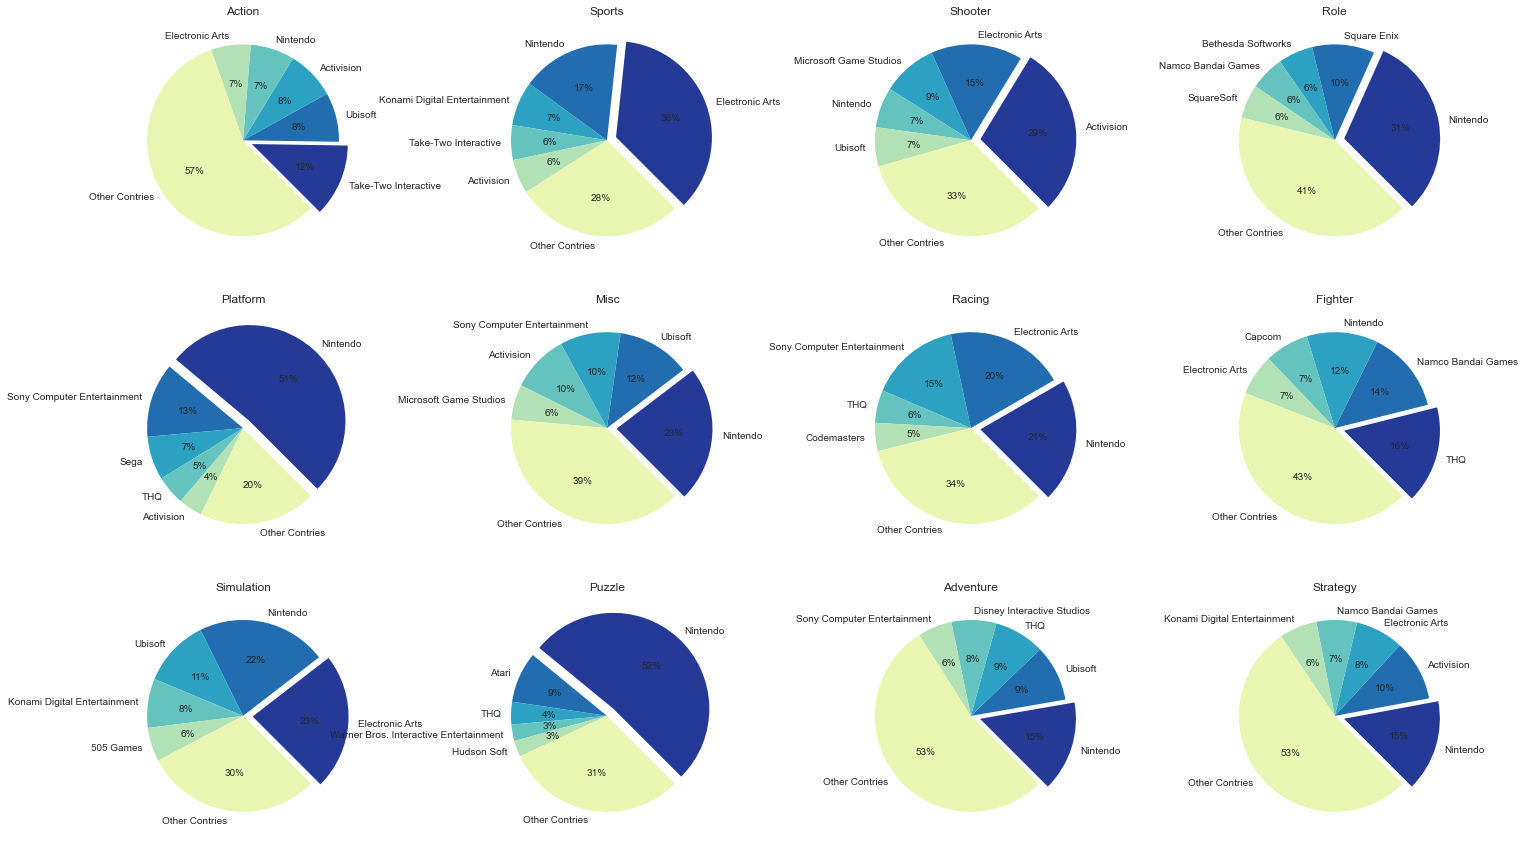

In [49]:
ax, fig = plt.subplots(figsize = (25,15))

ax1 = plt.subplot2grid(shape=(3,4), loc=(0,0))
ax2 = plt.subplot2grid(shape=(3,4), loc=(0,1))
ax3 = plt.subplot2grid(shape=(3,4), loc=(0,2))
ax4 = plt.subplot2grid(shape=(3,4), loc=(0,3))
ax5 = plt.subplot2grid(shape=(3,4), loc=(1,0))
ax6 = plt.subplot2grid(shape=(3,4), loc=(1,1))
ax7 = plt.subplot2grid(shape=(3,4), loc=(1,2))
ax8 = plt.subplot2grid(shape=(3,4), loc=(1,3))
ax9 = plt.subplot2grid(shape=(3,4), loc=(2,0))
ax10 = plt.subplot2grid(shape=(3,4), loc=(2,1))
ax11 = plt.subplot2grid(shape=(3,4), loc=(2,2))
ax12 = plt.subplot2grid(shape=(3,4), loc=(2,3))

ax1.pie(x = Action.Global_Sales, labels= Action.Publisher, colors = paleta2, startangle=-45, autopct='%.0f%%', explode=(0.1, 0, 0, 0, 0, 0))
ax1.set_title('Action')
ax2.pie(x = Sport.Global_Sales, labels= Sport.Publisher, colors = paleta2, startangle=-45, autopct='%.0f%%', explode=(0.1, 0, 0, 0, 0, 0))
ax2.set_title('Sports')
ax3.pie(x = Shooter.Global_Sales, labels= Shooter.Publisher, colors = paleta2, startangle=-45, autopct='%.0f%%', explode=(0.1, 0, 0, 0, 0, 0))
ax3.set_title('Shooter')
ax4.pie(x = Role.Global_Sales, labels= Role.Publisher, colors = paleta2, startangle=-45, autopct='%.0f%%', explode=(0.1, 0, 0, 0, 0, 0))
ax4.set_title('Role')
ax5.pie(x = Platform.Global_Sales, labels= Platform.Publisher, colors = paleta2, startangle=-45, autopct='%.0f%%', explode=(0.1, 0, 0, 0, 0, 0))
ax5.set_title('Platform')
ax6.pie(x = Misc.Global_Sales, labels= Misc.Publisher, colors = paleta2, startangle=-45, autopct='%.0f%%', explode=(0.1, 0, 0, 0, 0, 0))
ax6.set_title('Misc')
ax7.pie(x = Racing.Global_Sales, labels= Racing.Publisher, colors = paleta2, startangle=-45, autopct='%.0f%%', explode=(0.1, 0, 0, 0, 0, 0))
ax7.set_title('Racing')
ax8.pie(x = Fighter.Global_Sales, labels= Fighter.Publisher, colors = paleta2, startangle=-45, autopct='%.0f%%', explode=(0.1, 0, 0, 0, 0, 0))
ax8.set_title('Fighter')
ax9.pie(x = Sumulation.Global_Sales, labels= Sumulation.Publisher, colors = paleta2, startangle=-45, autopct='%.0f%%', explode=(0.1, 0, 0, 0, 0, 0))
ax9.set_title('Simulation')
ax10.pie(x = Puzzle.Global_Sales, labels= Puzzle.Publisher, colors = paleta2, startangle=-45, autopct='%.0f%%', explode=(0.1, 0, 0, 0, 0, 0))
ax10.set_title('Puzzle')
ax11.pie(x = Adventure.Global_Sales, labels= Adventure.Publisher, colors = paleta2, startangle=-45, autopct='%.0f%%', explode=(0.1, 0, 0, 0, 0, 0))
ax11.set_title('Adventure')
ax12.pie(x = strategy.Global_Sales, labels= strategy.Publisher, colors = paleta2, startangle=-45, autopct='%.0f%%', explode=(0.1, 0, 0, 0, 0, 0))
ax12.set_title('Strategy')

## S

In [50]:
df

,Rank,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,,,,,,
1980,259,Asteroids,2600,Shooter,Atari,4.00,0.26,0.00,0.05,4.31
1980,6319,Bridge,2600,Misc,Activision,0.25,0.02,0.00,0.00,0.27
1980,1971,Defender,2600,Misc,Atari,0.99,0.05,0.00,0.01,1.05
1980,5368,Freeway,2600,Action,Activision,0.32,0.02,0.00,0.00,0.34
1980,1768,Kaboom!,2600,Misc,Activision,1.07,0.07,0.00,0.01,1.15
...,...,...,...,...,...,...,...,...,...,...
2016,5290,Star Fox: Zero,WiiU,Shooter,Nintendo,0.16,0.10,0.07,0.03,0.35
2017,14393,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,Role-Playing,Sega,0.00,0.00,0.03,0.00,0.03
2017,16441,Brothers Conflict: Precious Baby,PSV,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01


In [51]:
len(df.Name.unique())

11325

In [52]:
gk = df.groupby(['Genre', 'Name'])[['Global_Sales']].sum()
gk

Global_Sales
Genre    Name                                                            
Action   .hack: Sekai no Mukou ni + Versus                           0.03
         007: Quantum of Solace                                      3.92
         007: The World is not Enough                                2.47
         1001 Touch Games                                            0.33
         2 Games in 1 Double Pack: The Incredibles / Fin...          1.76
...                                                                   ...
Strategy Zoo Tycoon 2                                                0.06
         Zoo Tycoon 2 DS                                             0.30
         Zoo Tycoon 2: Ultimate Collection                           0.26
         Zoo Tycoon DS                                               1.00
         Zoo Tycoon: Complete Collection                             0.06

[11329 rows x 1 columns]

In [73]:
array_videogames = []
temp = df.Genre.unique()

for i in range(len(df.Genre.unique())):
    x=top_array(temp[i], gk, 'Name')
    array_videogames.append(x)


In [74]:
array_videogames[1]

{'Name': {0: 'Wii Play',
  1: 'Minecraft',
  2: 'Kinect Adventures!',
  3: 'Brain Age: Train Your Brain in Minutes a Day',
  4: 'Guitar Hero III: Legends of Rock',
  5: 'Other Contries'},
 'Global_Sales': {0: 29.02,
  1: 23.73,
  2: 21.82,
  3: 20.22,
  4: 16.400000000000002,
  5: 678.6800000000001}}